In [29]:
# lets build the graph

from enum import Enum, auto
from random import sample, random

N_NODES = 500
N_WEEKS = 15
BETA = 0.3
RHO = 0.7

class State(Enum):
    # enum type for representing SIR states
    SUSCEPTIBLE = auto()
    INFECTED = auto()
    RECOVERED = auto()
    
network = [[(i-2)%N_NODES, (i-1)%N_NODES, (i+1)%N_NODES, (i+2)%N_NODES] for i in range(N_NODES)] # each node's neighbors

In [44]:
class Simulation:
    def __init__(self, network, initially_infected=None):
        self.network = network
        self.weeks = []
        self.weeks.append([State.SUSCEPTIBLE]*N_NODES)
        if initially_infected is None:
            initially_infected = sample(range(N_NODES), k=10)       
        for node in initially_infected:
            self.weeks[0][node] = State.INFECTED # self.weeks[0] represents initial state
        
    def simulate(self, n_weeks=N_WEEKS, beta=BETA, rho=RHO):
        for time in range(1,n_weeks+1): # we want to simulate from week 0 (initial state) to week 15
            self.weeks.append([State.SUSCEPTIBLE]*N_NODES)
            for node in range(N_NODES):
                old_state = self.weeks[time-1][node]
                if old_state == State.SUSCEPTIBLE:
                    m = [self.weeks[time-1][neigh] for neigh in self.network[node]].count(State.INFECTED)
                    new_state = State.INFECTED if random() < 1 - (1-beta)**m else State.SUSCEPTIBLE
                    self.weeks[time][node] = new_state
                elif old_state == State.INFECTED:
                    new_state = State.RECOVERED if random() < rho else State.INFECTED
                    self.weeks[time][node] = new_state
                else:
                    self.weeks[time][node] = State.RECOVERED
                    
    def get_weeks(self):
        return self.weeks

Text(0, 0.5, 'Number of infected nodes')

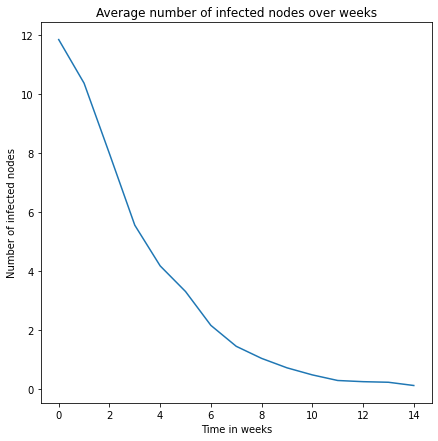

In [54]:
import numpy as np

N = 100

infec = []

for _ in range(N):
    s = Simulation(network)
    s.simulate()
    weeks = s.get_weeks()
    infec.append([len([node for node in range(N_NODES) if weeks[time-1][node]==State.SUSCEPTIBLE and weeks[time][node]==State.INFECTED]) for time in range(1,len(weeks))])
    
infec = np.array(infec)

fig = plt.figure(1, figsize=(7,7))
ax = plt.subplot(111)

ax.plot(range(1,N_WEEKS+1), np.mean(infec, axis=0))

plt.title("Average number of newly infected nodes over weeks")
plt.xlabel("Time in weeks")
plt.ylabel("Number of newly infected nodes")



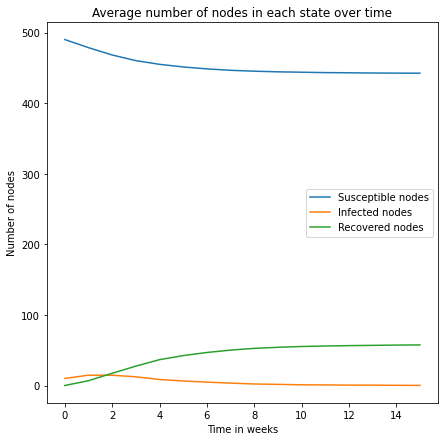

In [52]:
import numpy as np

N = 100

susc, infec, recov = [], [], []

for _ in range(N):
    s = Simulation(network)
    s.simulate()
    weeks = s.get_weeks()
    susc.append([weeks[time].count(State.SUSCEPTIBLE) for time in range(len(weeks))])
    infec.append([weeks[time].count(State.INFECTED) for time in range(len(weeks))])
    recov.append([weeks[time].count(State.RECOVERED) for time in range(len(weeks))])
    
susc, infec, recov = np.array(susc), np.array(infec), np.array(recov)

fig = plt.figure(1, figsize=(7,7))
ax = plt.subplot(111)
ax.plot(np.mean(susc, axis=0), label='Susceptible nodes')
ax.plot(np.mean(infec, axis=0), label='Infected nodes')
ax.plot(np.mean(recov, axis=0), label='Recovered nodes')
plt.title("Average number of nodes in each state over time")
plt.xlabel("Time in weeks")
plt.ylabel("Number of nodes")

ax.legend()